# **Access data from kaggle**

In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sheroook","key":"02840f90001498510610d93321c345e1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
cd /content

/content


In [ ]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51            351  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44            628  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates           4KB  2020-11-26 00:21:15            215  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55             71  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with rea

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 33.3MB/s]
100% 2.29G/2.29G [00:29<00:00, 84.0MB/s]


In [ ]:
from zipfile import ZipFile

file_name = "/content/chest-xray-pneumonia.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


# **Exploring data**

In [ ]:
import os
#TRAIN
PTrainList=os.listdir("/content/chest_xray/train/PNEUMONIA")
NTrainList=os.listdir("/content/chest_xray/train/NORMAL")
print("P",len(PTrainList))
print("N",len(NTrainList))

#VAL
PValList=os.listdir("/content/chest_xray/val/PNEUMONIA")
NValList=os.listdir("/content/chest_xray/val/NORMAL")
print("P",len(PValList))
print("N",len(NValList))

P 3875
N 1341
P 8
N 8


# **Data Augmentation**

In [ ]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
from google.colab.patches import cv2_imshow
import cv2
import imutils

IM=NTrainList[0]
IM="/content/chest_xray/train/NORMAL/"+IM
img = cv2.imread(IM)
cv2_imshow(img)
# Use Flip code 1 to flip horizontally 
#img = cv2.flip(img, 1) 
#alpha = 1 # Contrast control (1.0-3.0)
#beta = 50 # Brightness control (0-100)
#img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
#print("_____________")
cv2_imshow(img)
#imsave(IM+'Aug1.jpeg', img)

img = imutils.rotate(img, 20)
alpha = 1 # Contrast control (1.0-3.0)
beta = 30 # Brightness control (0-100)
img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
print("_____________")
cv2_imshow(img)
#imsave(IM+'Aug2.jpeg', img)



In [ ]:
from scipy import ndimage
from google.colab.patches import cv2_imshow
from scipy import misc
import imgaug.augmenters as iaa

import cv2
IM=NTrainList[0]
IM="/content/chest_xray/train/NORMAL/"+IM
img = cv2.imread(IM)
cv2_imshow(img)

contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(img)
cv2_imshow(contrast_image)
scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
scale_image =scale_im.augment_image(contrast_image)
cv2_imshow(scale_image)


In [ ]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
import cv2
import imutils
from scipy import ndimage
from scipy import misc

#AUG for NORMAL only
c=0
for IM in NTrainList:
  img = cv2.imread("/content/chest_xray/train/NORMAL/"+IM)
  if c%2==0: #using different 2 aug. based on index
    # Use Flip code 1 to flip horizontally 
    img = cv2.flip(img, 1) 
    alpha = 1 # Contrast control (1.0-3.0)
    beta = 50 # Brightness control (0-100)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    imsave("/content/chest_xray/train/NORMAL/"+IM+'Aug1.jpeg', img)
  else:
    img = imutils.rotate(img, 20)
    alpha = 1 # Contrast control (1.0-3.0)
    beta = 30 # Brightness control (0-100)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    imsave("/content/chest_xray/train/NORMAL/"+IM+'Aug2.jpeg', img)
  print(IM)
  print(c)
  c+=1

IM-0241-0001.jpeg
0
IM-0519-0001.jpeg
1
NORMAL2-IM-1113-0001.jpeg
2
NORMAL2-IM-0414-0001.jpeg
3
IM-0478-0001.jpeg
4
NORMAL2-IM-0404-0001.jpeg
5
NORMAL2-IM-1044-0001.jpeg
6
NORMAL2-IM-0772-0001.jpeg
7
NORMAL2-IM-0520-0001.jpeg
8
NORMAL2-IM-0529-0001.jpeg
9
IM-0286-0001.jpeg
10
IM-0213-0001.jpeg
11
IM-0471-0001.jpeg
12
IM-0564-0001.jpeg
13
NORMAL2-IM-1385-0001.jpeg
14
NORMAL2-IM-1028-0001.jpeg
15
NORMAL2-IM-0820-0001.jpeg
16
NORMAL2-IM-1316-0001.jpeg
17
NORMAL2-IM-0663-0001.jpeg
18
NORMAL2-IM-0561-0001.jpeg
19
NORMAL2-IM-0571-0001.jpeg
20
NORMAL2-IM-1252-0001.jpeg
21
NORMAL2-IM-0906-0001.jpeg
22
NORMAL2-IM-1011-0001.jpeg
23
IM-0371-0001.jpeg
24
NORMAL2-IM-0640-0001.jpeg
25
NORMAL2-IM-1150-0001.jpeg
26
NORMAL2-IM-1096-0001-0001.jpeg
27
IM-0393-0001.jpeg
28
NORMAL2-IM-0386-0001.jpeg
29
IM-0629-0001-0001.jpeg
30
NORMAL2-IM-0999-0001.jpeg
31
NORMAL2-IM-0413-0001.jpeg
32
NORMAL2-IM-1237-0001.jpeg
33
IM-0205-0001.jpeg
34
IM-0437-0001-0002.jpeg
35
IM-0273-0001.jpeg
36
IM-0630-0001.jpeg
37
IM-01

In [ ]:
#AFTER AUG
import os
#TRAIN
PTrainList=os.listdir("/content/chest_xray/train/PNEUMONIA")
NTrainList=os.listdir("/content/chest_xray/train/NORMAL")
print("P",len(PTrainList))
print("N",len(NTrainList))

#VAL
PValList=os.listdir("/content/chest_xray/val/PNEUMONIA")
NValList=os.listdir("/content/chest_xray/val/NORMAL")
print("P",len(PValList))
print("N",len(NValList))

P 3875
N 2682
P 8
N 8


In [ ]:
#2nd AUG
from scipy import ndimage
from google.colab.patches import cv2_imshow
from scipy import misc
import imgaug.augmenters as iaa
import cv2
from skimage.io import imread, imsave

c=0
for IM in NTrainList:
  img = cv2.imread("/content/chest_xray/train/NORMAL/"+IM)
  if c%3==0: #using different 2 aug. based on index
    contrast=iaa.GammaContrast(gamma=2.0)
    contrast_image =contrast.augment_image(img)
    #cv2_imshow(contrast_image)
    scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
    img =scale_im.augment_image(contrast_image)
    imsave("/content/chest_xray/train/NORMAL/"+IM+'Aug3.jpeg', img)
    print(IM)
    print(c)
  c+=1

IM-0241-0001.jpeg
0
NORMAL2-IM-1197-0001.jpegAug2.jpeg
3
IM-0649-0001.jpegAug1.jpeg
6
NORMAL2-IM-0414-0001.jpeg
9
NORMAL2-IM-0404-0001.jpeg
12
NORMAL2-IM-0520-0001.jpeg
15
IM-0286-0001.jpeg
18
IM-0384-0001.jpegAug2.jpeg
21
IM-0564-0001.jpeg
24
NORMAL2-IM-1028-0001.jpeg
27
NORMAL2-IM-0695-0001.jpegAug2.jpeg
30
NORMAL2-IM-0561-0001.jpeg
33
NORMAL2-IM-0571-0001.jpeg
36
IM-0219-0001.jpegAug1.jpeg
39
NORMAL2-IM-1011-0001.jpeg
42
NORMAL2-IM-0640-0001.jpeg
45
IM-0393-0001.jpeg
48
NORMAL2-IM-0999-0001.jpeg
51
NORMAL2-IM-0988-0001.jpegAug1.jpeg
54
IM-0437-0001-0002.jpeg
57
NORMAL2-IM-0496-0001.jpegAug1.jpeg
60
IM-0135-0001.jpeg
63
NORMAL2-IM-0537-0001.jpeg
66
NORMAL2-IM-1244-0001.jpegAug2.jpeg
69
NORMAL2-IM-0818-0001.jpeg
72
IM-0704-0001.jpegAug2.jpeg
75
NORMAL2-IM-1243-0001.jpeg
78
NORMAL2-IM-0388-0001.jpeg
81
NORMAL2-IM-1266-0001.jpeg
84
NORMAL2-IM-1141-0001.jpeg
87
NORMAL2-IM-0995-0001-0001.jpegAug1.jpeg
90
NORMAL2-IM-1345-0001-0001.jpegAug2.jpeg
93
NORMAL2-IM-1327-0001.jpeg
96
NORMAL2-IM-04

In [7]:
#AFTER 2nd AUG
import os
#TRAIN
PTrainList=os.listdir("/content/chest_xray/train/PNEUMONIA")
NTrainList=os.listdir("/content/chest_xray/train/NORMAL")
print("P",len(PTrainList))
print("N",len(NTrainList))

#VAL
PValList=os.listdir("/content/chest_xray/val/PNEUMONIA")
NValList=os.listdir("/content/chest_xray/val/NORMAL")
print("P",len(PValList))
print("N",len(NValList))

P 3875
N 3576
P 8
N 8


# **Data Preparation**

In [8]:
import numpy as np
import os
import random
NTrainPath="/content/chest_xray/train/NORMAL"
PTrainPath="/content/chest_xray/train/PNEUMONIA"
TrainData=[]
for N in os.listdir(NTrainPath):
  TrainData.append(["/content/chest_xray/train/NORMAL/"+N,0])
for P in os.listdir(PTrainPath):
  TrainData.append(["/content/chest_xray/train/PNEUMONIA/"+P,1])
print(len(TrainData))
print(TrainData[0])
print(TrainData[len(TrainData)-1])
#Shuffle data
random.shuffle(TrainData)
print("After Shuffle")
print(len(TrainData))
print(TrainData[0])
print(TrainData[len(TrainData)-1])
print(TrainData[1300])

7451
['/content/chest_xray/train/NORMAL/IM-0241-0001.jpeg', 0]
['/content/chest_xray/train/PNEUMONIA/person1544_bacteria_4035.jpeg', 1]
After Shuffle
7451
['/content/chest_xray/train/NORMAL/IM-0347-0001.jpeg', 0]
['/content/chest_xray/train/NORMAL/IM-0662-0001.jpeg', 0]
['/content/chest_xray/train/NORMAL/IM-0354-0001.jpeg', 0]


In [9]:
import cv2
from keras.utils import to_categorical

# ValidationData
ValData=[]
Vlabels=[]
for img in os.listdir("/content/chest_xray/val/NORMAL"):
    img = cv2.imread("/content/chest_xray/val/NORMAL/"+img)  
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    ValData.append(img)
    Vlabels.append(label)
                      
for img in os.listdir("/content/chest_xray/val/PNEUMONIA"):
    img = cv2.imread("/content/chest_xray/val/PNEUMONIA/"+img)
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1: #if grayscale
        img = np.dstack([img, img, img]) #convert into 3 channels.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    ValData.append(img)
    Vlabels.append(label)
    
# Convert the list into numpy arrays
ValData = np.array(ValData)
Vlabels = np.array(Vlabels)

print(ValData.shape)
print(Vlabels.shape)

(16, 150, 150, 3)
(16, 2)


# **Data generators**

In [14]:
def Tgenerator(data,batch_size):
    #c=0
    while True:
      for start in range(0, len(TrainData),batch_size):
          count = 0
          batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
          batch_labels = np.zeros((batch_size,2), dtype=np.float32)
          end = min(start + batch_size, len(TrainData))
          for i in range(start, end):
            img_name = data[i][0]
            label = data[i][1]
            #print(count)
            #print(label,img_name)
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(img_name)
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img]) #convert to 3 channels.
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            count+=1
          yield  batch_data, batch_labels

In [12]:
from keras import backend as K
#define another metrices
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir="/content/chest_xray/train"
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(224,224),batch_size=16,class_mode='binary')


validation_dir="/content/chest_xray/val"
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(224,224),batch_size=16,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# **Building CNN Model**

In [13]:
import glob
import h5py
import shutil
import imgaug as aug
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.applications import VGG19
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from tensorflow.python.keras import regularizers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


In [52]:

input_tensor = Input(shape=(224, 224, 3))
vgg_conv = VGG19(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the vgg convolutional base model
model.add(vgg_conv)
model.add(layers.Dropout(0.5))
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
#model.add(BatchNormalization())

#model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same')) 
#model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same')) #best without that 85
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f08aa49d048> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ab5d8e10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ab6b9898> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f08ab6b9c88> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ab4e7a90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ab5e6c50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f08ab5e6588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08adb9acf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08aa514ba8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08aa514c18> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08bc040e80> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
separable_conv2d_17 (Separab (None, 7, 7, 128)         70272     
_________________________________________________________________
separable_conv2d_18 (Separab (None, 7, 7, 128)         17664     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
separable_conv2d_19 (Separab (None, 3, 3, 256)         34176     
_________________________________________________________________
batch_normalization_5 (Batch (None, 3, 3, 256)        

In [54]:
opt = optimizers.Adam(lr=0.0001, decay=1e-5)
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath='BestModel', save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m],optimizer=opt) 

In [43]:
batch_size = 16

# Get a train data generator
train_data_gen = Tgenerator(TrainData,batch_size)

# Define the number of training steps
steps = len(TrainData)//batch_size
print(steps)

465


In [45]:
# Fit the model
history = model.fit_generator(train_data_gen, epochs=10, steps_per_epoch=steps,validation_data=(ValData, Vlabels),callbacks=[es, chkpt],class_weight={0:1.0, 1:0.4}) #save the best one

Epoch 1/10
465/465 [==============================] - 143s 306ms/step - loss: 0.2088 - acc: 0.7993 - f1_m: 0.7993 - precision_m: 0.7993 - recall_m: 0.7993 - val_loss: 0.4686 - val_acc: 0.8125 - val_f1_m: 0.8125 - val_precision_m: 0.8125 - val_recall_m: 0.8125
Epoch 2/10
465/465 [==============================] - 144s 310ms/step - loss: 0.0715 - acc: 0.9546 - f1_m: 0.9548 - precision_m: 0.9546 - recall_m: 0.9551 - val_loss: 0.3826 - val_acc: 0.7500 - val_f1_m: 0.7500 - val_precision_m: 0.7500 - val_recall_m: 0.7500
Epoch 3/10
465/465 [==============================] - 145s 311ms/step - loss: 0.0581 - acc: 0.9626 - f1_m: 0.9629 - precision_m: 0.9626 - recall_m: 0.9632 - val_loss: 0.4734 - val_acc: 0.7500 - val_f1_m: 0.7500 - val_precision_m: 0.7500 - val_recall_m: 0.7500
Epoch 4/10
465/465 [==============================] - 144s 309ms/step - loss: 0.0488 - acc: 0.9688 - f1_m: 0.9684 - precision_m: 0.9681 - recall_m: 0.9688 - val_loss: 0.3876 - val_acc: 0.7500 - val_f1_m: 0.7500 - val_pre

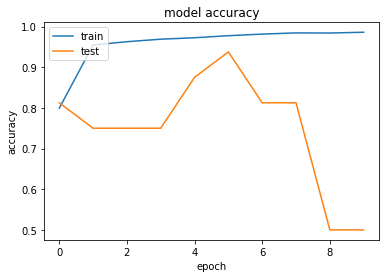

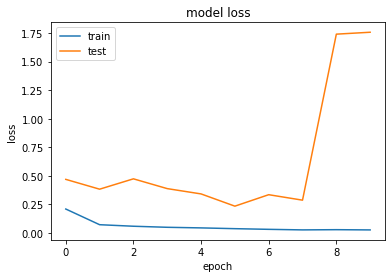

In [47]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Testing**

In [23]:
# Preparing test data
import os
import cv2
test_data = []
test_labels = []

for img in os.listdir("/content/chest_xray/test/NORMAL"):
    img = cv2.imread("/content/chest_xray/test/NORMAL/"+img)
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
                      
for img in os.listdir("/content/chest_xray/test/PNEUMONIA"):
    img = cv2.imread("/content/chest_xray/test/PNEUMONIA/"+img)
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 224, 224, 3)
Total number of labels: (624, 2)


In [55]:
model.load_weights("/content/BestModel1/BestModel")

In [56]:
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

(624,)
(624,)


In [57]:
#Total Test Accuracy
Acc=0
for i in range(len(preds)):
  if preds[i]==orig_test_labels[i]:
    Acc+=1
print(Acc/624)

0.8621794871794872


<Figure size 432x288 with 0 Axes>

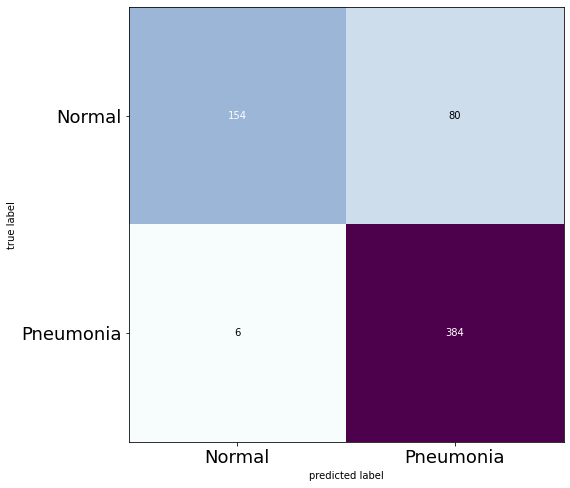

In [38]:
#Confusion Matrix
cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.BuPu)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=18)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=18)
plt.show()

PredictedLabel is:  Normal
TrueLabel is: Normal


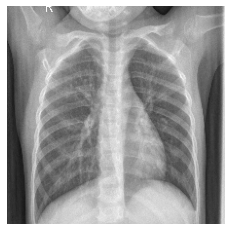

In [ ]:
L=["Normal","Pneumonia"]
img = cv2.imread("/content/chest_xray/test/NORMAL/IM-0009-0001.jpeg")
img = cv2.resize(img, (224,224))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.
label = to_categorical(0, num_classes=2)
PredictedLabel = np.argmax(model.predict(img))
#print(PredictedLabel)
print("PredictedLabel is: ",L[PredictedLabel])
print("TrueLabel is:",L[np.argmax(label)])

PredictedLabel is:  Pneumonia
TrueLabel is: Pneumonia


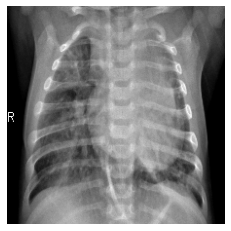

In [ ]:
img = cv2.imread("/content/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
img = cv2.resize(img, (224,224))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.
label = to_categorical(1, num_classes=2)
PredictedLabel = np.argmax(model.predict(img))
#print(PredictedLabel)
print("PredictedLabel is: ",L[PredictedLabel])
print("TrueLabel is:",L[np.argmax(label)])

In [58]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.98
Precision of the model is 0.83


In [46]:
import shutil
shutil.make_archive('/content/Pne_VS_Normal', 'zip', '/content/BestModel1')

'/content/Pne_VS_Normal.zip'